In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 0. One hot encoded features

In [69]:
# import data of first fold without balancing
one_hot = pd.read_csv('path/to/9_FINAL/data/machine_learning/two_class/one-hot-ecoding/train/cross_validation/training_fraction_normal_distribution/training_0.csv',
                     sep=";", index_col=0)
one_hot.head()

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label
0,taco,museum,3,2,3,303665257,"['p3a', 'p3a', 'p8a']",0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,auster,servant,2,1,2,440879128,['p8a'],0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,joy,crop,1,1,1,249496097,['p3a'],0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,libertarian,invasion,3,2,3,461763252,"['p8a', 'p8d']",0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,blonsky,woman,1,1,1,39589698,['p8a'],0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [70]:
# only get label and patterns
one_hot_patterns = one_hot.drop(['instance', 'class', 'frequency', 'pidspread', 'pldspread', 'id', 'pids', 'label'],
                               axis=1)
one_hot_patterns.head()

,p1,p10,p11,p12a,p12b,p12c,p13,p14,p15a,p15b,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
# display patterns in heat map
corr = one_hot_patterns.corr()

In [72]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

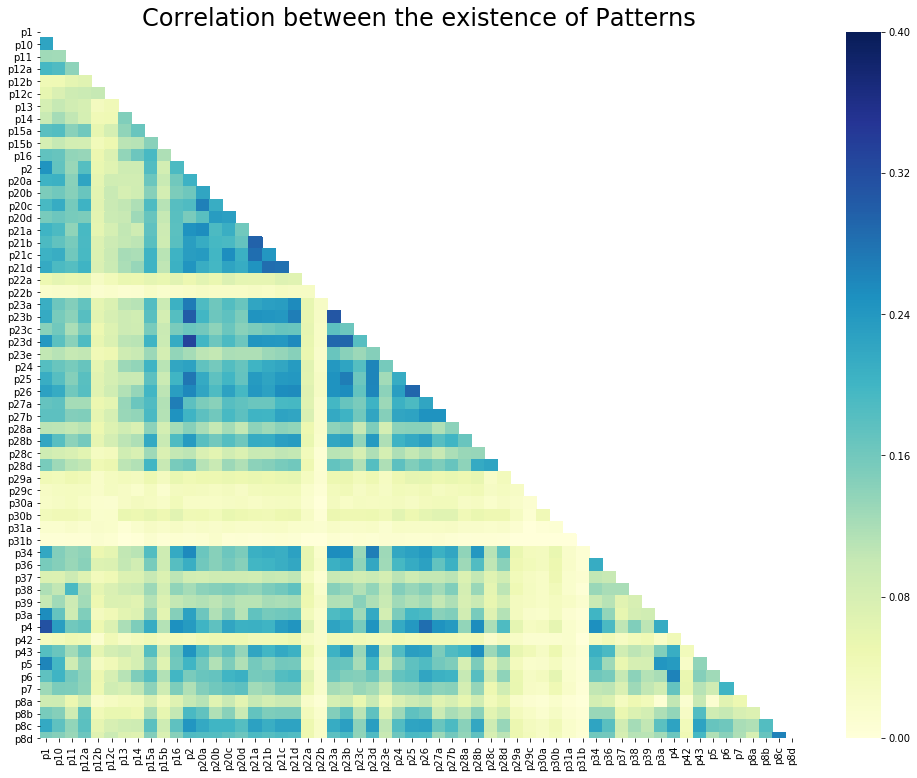

In [74]:
# change size of the plot
fig, ax = plt.subplots(figsize=(17,13))
# Draw the heatmap with the mask and correct aspect ratio
plt.title('Correlation between the existence of Patterns', fontsize=24)
#ax.figure.axes[-1].yaxis.label.set_size(18)
sns.heatmap(corr, mask=mask, ax=ax, cmap='YlGnBu',vmax=0.4)

In [54]:
# get second highest correlation but 1
highest_in_each_column = []
for (columnName, columnData) in corr.iteritems():
    values = columnData.values
    values.sort()
    #print(values)
    highest_in_each_column.append(values[-2])

In [55]:
highest_in_each_column.sort()

In [56]:
highest_in_each_column

[0.017912765020666258,
 0.025492390009009047,
 0.03070727641152696,
 0.04201685215148521,
 0.04208921124083566,
 0.05738371767347844,
 0.061075003732296705,
 0.06833854369385092,
 0.07742704578511903,
 0.09988175448753323,
 0.09988175448753323,
 0.11608312657995118,
 0.12022304731614428,
 0.1433006057547716,
 0.14347303772564,
 0.14861328058474635,
 0.16710279478729992,
 0.1674064981511395,
 0.18308271270218704,
 0.19311324705629127,
 0.19311324705629127,
 0.19340581072069224,
 0.1988228471976709,
 0.20275835878569534,
 0.218408073577278,
 0.22480759893503133,
 0.22484797132479295,
 0.22484797132479295,
 0.22909196920197578,
 0.23171297388228154,
 0.23442683258238725,
 0.23442683258238725,
 0.24811659311899856,
 0.252036085506334,
 0.2530682448470785,
 0.2537177109959976,
 0.2611066557399534,
 0.2616964803078905,
 0.2633844760908112,
 0.26448915008566265,
 0.26448915008566265,
 0.2662590397966346,
 0.2662590397966346,
 0.2672799566274637,
 0.2675454228745579,
 0.2675454228745579,
 0.28

In [75]:
# show in which column highest correlation exists
for (columnName, columnData) in corr.iteritems():
    if highest_in_each_column[-1] in columnData.values:
        print(columnName)

p2
p23d


In [77]:
corr['p23d']

p1      0.239152
p10     0.178978
p11     0.142675
p12a    0.189050
p12b    0.057544
p12c    0.073539
p13     0.106559
p14     0.109662
p15a    0.202494
p15b    0.094890
p16     0.214870
p2      0.331707
p20a    0.198932
p20b    0.163974
p20c    0.191534
p20d    0.164199
p21a    0.244877
p21b    0.241240
p21c    0.239774
p21d    0.256212
p22a    0.057391
p22b    0.024007
p23a    0.289299
p23b    0.293413
p23c    0.182408
p23d    1.000000
p23e    0.145994
p24     0.261107
p25     0.262174
p26     0.260693
p27a    0.203493
p27b    0.223145
p28a    0.150414
p28b    0.237436
p28c    0.118475
p28d    0.182911
p29a    0.047587
p29c    0.035307
p30a    0.028226
p30b    0.049400
p31a    0.021981
p31b    0.008341
p34     0.267280
p36     0.220073
p37     0.094547
p38     0.136629
p39     0.118487
p3a     0.218020
p4      0.246288
p42     0.038169
p43     0.234265
p5      0.197104
p6      0.162418
p7      0.124055
p8a     0.096929
p8b     0.176110
p8c     0.231990
p8d     0.188574
Name: p23d, dt